In [2]:
import math
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import date
import numpy.random as npr
import matplotlib.pyplot as plt
from pylab import mpl
import scipy.optimize as sco
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus']=False

In [3]:
DataUsed=pd.read_excel('predict.xlsx') #or 'predict.xlsx'
DataUsed

,yr2_hat,yr3_hat,yr4_hat,yr5_hat
0,0.004583,0.007066,0.005096,0.004933
1,-0.008069,-0.013844,-0.020353,-0.024500
2,-0.000210,0.000981,-0.000680,-0.001665
3,-0.000775,-0.003026,-0.005432,-0.007044
4,-0.006621,-0.011581,-0.016937,-0.021895
...,...,...,...,...
475,0.002944,0.004810,0.004781,0.004671
476,-0.006676,-0.013807,-0.020314,-0.025457
477,-0.004563,-0.008153,-0.010469,-0.014693
478,-0.002429,-0.005027,-0.006768,-0.009294


In [4]:
returns_annual = np.power(DataUsed.mean()+1,12)-1 #计算年化收益率
cov_annual = np.power(DataUsed.cov()+1,12)-1
print(returns_annual)
print(cov_annual)

yr2_hat    0.059429
yr3_hat    0.099049
yr4_hat    0.123811
yr5_hat    0.118274
dtype: float64
          yr2_hat   yr3_hat   yr4_hat   yr5_hat
yr2_hat  0.002135  0.003823  0.005306  0.006221
yr3_hat  0.003823  0.006938  0.009698  0.011386
yr4_hat  0.005306  0.009698  0.013653  0.016059
yr5_hat  0.006221  0.011386  0.016059  0.018918


In [5]:
#weights = 2*np.random.random(number_assets)-1
weights = np.random.uniform(-1, 1, size=(4))#权重
print(weights)

[-0.1526904   0.29178823 -0.12482558  0.783546  ]


C:\Users\yuan1\AppData\Local\Temp\ipykernel_30852\1494624543.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


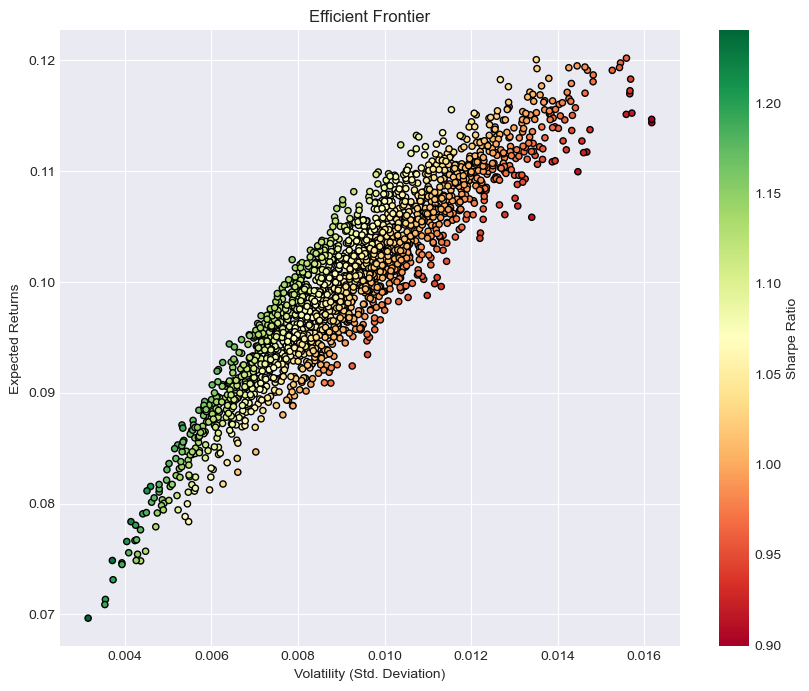

In [6]:
A=0.3 #风险偏好系数
#模拟50000个投资组合
selected = ['yr2', 'yr3', 'yr4', 'yr5']
number_assets = 4
portfolio_returns = []#组合收益率
portfolio_volatilities = []#组合波动率
sharpe_ratio = []#夏普比率
stock_weights = []
Utility=[] #效用
np.random.seed(0)  # 设置随机种子
for singel_portfolio in range(2000):
    #weights = 2*np.random.random(number_assets)-1#允许卖空，权重
    weights = np.random.random(number_assets)#不允许卖空，权重
    weights = weights/(np.sum(weights))#权重归一化
    weights = np.clip(weights, 0, 1) #权重调整到[-1,1]
    returns = np.dot(weights,returns_annual)#投资组合收益率
    volatility = np.dot(np.dot(weights,cov_annual),weights.T)#投资组合波动率
    if returns:
        utility=returns-A*volatility
        Utility.append(utility)
        portfolio_returns.append(returns)
        portfolio_volatilities.append(volatility)
        sharpe = returns/np.power(volatility,1/2)#计算夏普比率
        sharpe_ratio.append(sharpe)
        stock_weights.append(weights)
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatilities,
             'Sharpe Ratio': sharpe_ratio,
             'Utility':Utility,}
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

df = pd.DataFrame(portfolio)

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10,8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

C:\Users\yuan1\AppData\Local\Temp\ipykernel_30852\3045882444.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


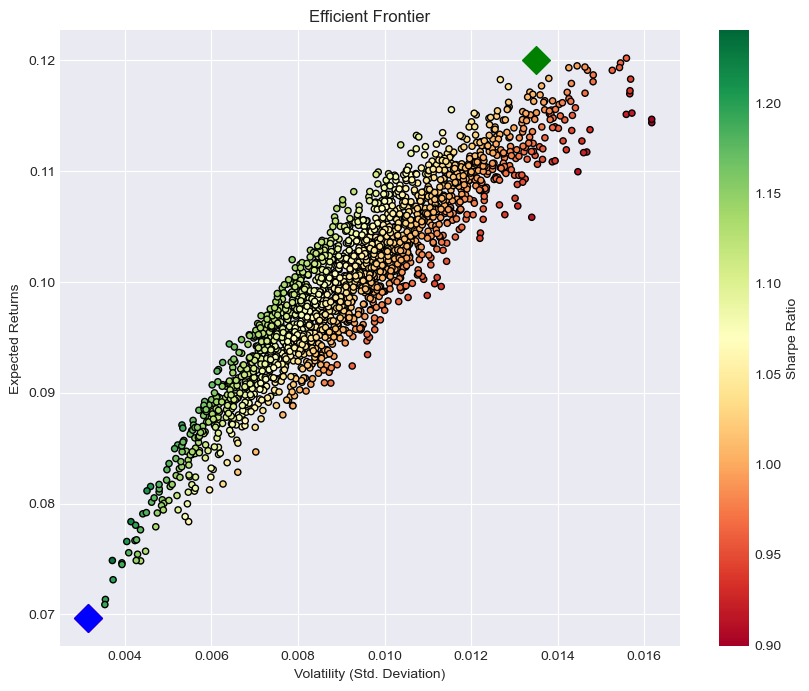

In [7]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_utility=df['Utility'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_utility_port=df.loc[df['Utility']==max_utility]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=max_utility_port['Volatility'], y=max_utility_port['Returns'], c='green', marker='D', s=200 )

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [8]:
#找出最优组合和有着最低波动率的组合
print(min_variance_port.T)
print(sharpe_portfolio.T)
print(max_utility_port.T)

                   486
Returns       0.069655
Volatility    0.003154
Sharpe Ratio  1.240282
Utility       0.068709
yr2 Weight    0.752248
yr3 Weight    0.228624
yr4 Weight    0.007661
yr5 Weight    0.011467
                   486
Returns       0.069655
Volatility    0.003154
Sharpe Ratio  1.240282
Utility       0.068709
yr2 Weight    0.752248
yr3 Weight    0.228624
yr4 Weight    0.007661
yr5 Weight    0.011467
                  1681
Returns       0.120057
Volatility    0.013506
Sharpe Ratio  1.033062
Utility       0.116006
yr2 Weight    0.037946
yr3 Weight    0.022223
yr4 Weight    0.802456
yr5 Weight    0.137375
